In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import seaborn as sns
from scipy import stats
import os
import glob
from astropy.table import Table, hstack, vstack, join
from matplotlib import gridspec
plt.style.use('ggplot')

In [2]:
def offset(obj,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE/MUSE Systematic Error New"):
    hdu = fits.open('%s/%s/%s_syst_table.fits'%(destination_path_cube,obj,obj))
    central_tab = hdu[1].data
    central_columns = hdu[1].header
    del_x = central_tab.field('del_x')
    del_y = central_tab.field('del_y')
    return del_x,del_y

def min_max_hist(del_x_pix_wing,del_y_pix_wing):
    min_hist_x = np.min(del_x_pix_wing)
    max_hist_x = np.max(del_x_pix_wing)
    min_hist_y = np.min(del_y_pix_wing)
    max_hist_y = np.max(del_y_pix_wing)
    return min_hist_x,max_hist_x,min_hist_y,max_hist_y

def sys_err(del_x_pix_wing,del_y_pix_wing):
    std_x_pix_wing = np.nanstd(del_x_pix_wing)
    std_y_pix_wing = np.nanstd(del_y_pix_wing)
    percentile_x_pix_wing = np.percentile(del_x_pix_wing,68)
    percentile_y_pix_wing = np.percentile(del_y_pix_wing,68)
    return  std_x_pix_wing,std_y_pix_wing,percentile_x_pix_wing,percentile_y_pix_wing

def sys_tab(obj,del_x_pix_wing,del_y_pix_wing,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    c1 = fits.Column(name='del_x', array=del_x_pix_wing, format='E')
    c2 = fits.Column(name='del_y', array=del_y_pix_wing, format='E')
    t = fits.BinTableHDU.from_columns([c1, c2])
    t.writeto('%s/MUSE Systematic Error New/%s/%s_syst_table.fits'%(destination_path_cube,obj,obj),overwrite=True)
    
def sys_err_tab(obj,sigma_x_fit,sigma_y_fit,percentile_x_pix_wing,percentile_y_pix_wing,sigma_x_act,sigma_y_act,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    c1 = fits.Column(name='sigma_x_fit', array=np.array([sigma_x_fit]), format='E')
    c2 = fits.Column(name='sigma_y_fit', array=np.array([sigma_y_fit]), format='E')
    c3 = fits.Column(name='percentile_x_pix_wing', array=np.array([percentile_x_pix_wing]), format='E')
    c4 = fits.Column(name='percentile_y_pix_wing', array=np.array([percentile_y_pix_wing]), format='E')
    c5 = fits.Column(name='sigma_x_act', array=np.array([sigma_x_act]), format='E')
    c6 = fits.Column(name='sigma_y_act', array=np.array([sigma_y_act]), format='E')
    t = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5, c6])
    t.writeto('%s/MUSE Systematic Error New/%s/%s_syst_errtab.fits'%(destination_path_cube,obj,obj),overwrite=True)

def source_name_tab(obj,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    a1 = np.array(['%s'%(obj)])
    hdu = fits.BinTableHDU.from_columns([fits.Column(name='Source', format='20A', array=a1)])
    hdu.writeto('%s/%s/source_%s.fits'%(destination_path_cube,obj,obj),overwrite=True) 
    
def source_sys_err_tab(obj,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    t1 = Table.read('%s/%s/source_%s.fits'%(destination_path_cube,obj,obj),format='fits')
    t2 = Table.read('%s/MUSE Systematic Error New/%s/%s_syst_errtab.fits'%(destination_path_cube,obj,obj),format='fits')
    new = hstack([t1, t2])
    new.write('%s/MUSE Systematic Error New/%s/%s_syst_errtab.fits'%(destination_path_cube,obj,obj),overwrite=True)
   

Estimation of the standard deviation of the error of the outflow offset in pixel along x and y directions

In [12]:
def plot_hist(obj,del_x_pix_wing,del_y_pix_wing,percentile_x_pix_wing,percentile_y_pix_wing,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    #a = np.percentile(del_x_pix_wing,100)
    bins_x = np.linspace(-20*percentile_x_pix_wing,20*percentile_x_pix_wing, 40)
    bins_y = np.linspace(-20*percentile_y_pix_wing,20*percentile_y_pix_wing, 40)
    select_x = (del_x_pix_wing > -20*percentile_x_pix_wing) & (del_x_pix_wing < 20*percentile_x_pix_wing)
    
    select_y = (0.2*del_y_pix_wing > -20*percentile_y_pix_wing) & (del_y_pix_wing < 20*percentile_y_pix_wing)

    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['axes.edgecolor'] = 'k'
    gs = gridspec.GridSpec(2,1, width_ratios=[1],height_ratios=[1,1]) 


    fig = plt.figure(figsize=(20,11))
    ax1 = fig.add_axes([0.06, 0.1, 0.46, 0.84]) # main axes
    ax2 = fig.add_axes([0.522, 0.1, 0.46, 0.84]) # main axes

    plt.setp(ax2.get_yticklabels(), visible=False)

    ax1.hist(1000*0.2*del_x_pix_wing,bins=np.linspace(-20,20, 40),alpha=0.3,color='red',label='x offsets')
    ax1.axvline(x=0,color='k')
    ax1.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=21)
    ax1.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=8)
    ax1.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=4)
    ax1.minorticks_on()
    ax1.legend(facecolor='white', framealpha=1, fontsize=21, loc='upper left')
    ax1.set_ylabel('Number',fontsize=21)
    ax1.set_xlabel('$\delta \  x (mas)$',fontsize=21)
    #ax.set_yscale('log',basey=10)
    ax1.set_ylim(0,65)
    ax1.set_xlim(-19,19)

    ax2.hist(1000*0.2*del_y_pix_wing,bins=np.linspace(-20,20, 40),alpha=0.3,color='k',label='y offsets')
    ax2.axvline(x=0,color='k')
    ax2.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=21)
    ax2.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=8)
    ax2.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=4)
    ax2.minorticks_on()
    ax2.legend(facecolor='white', framealpha=1, fontsize=21, loc='upper left')
    #ax2.set_ylabel('$log(W_{80}\\  /[km\ s^{-1}])$',fontsize=21)
    ax2.set_xlabel('$\delta \  y (mas)$',fontsize=21)
    #ax.set_yscale('log',basey=10)
    #ax2.set_yticks([])
    ax2.set_ylim(0,60)
    ax2.set_xlim(-19,19)

    fig.savefig('/home/mainak/Downloads/Outflow_paper1/HE0040-1105_syst_err',overwrite=True)


In [13]:
def algorithm_script(obj,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    print ('%s'%(obj))
    (del_x_pix_wing,del_y_pix_wing) = offset(obj)
    (std_x_pix_wing,std_y_pix_wing,percentile_x_pix_wing,percentile_y_pix_wing) = sys_err(del_x_pix_wing,del_y_pix_wing)
    select_x = (del_x_pix_wing > -10*percentile_x_pix_wing) & (del_x_pix_wing < 10*percentile_x_pix_wing)
    select_y = (del_y_pix_wing > -10*percentile_y_pix_wing) & (del_y_pix_wing < 10*percentile_y_pix_wing)

    (mu_x_fit, sigma_x_fit) = stats.norm.fit(del_x_pix_wing[select_x])
    (mu_y_fit, sigma_y_fit) = stats.norm.fit(del_y_pix_wing[select_y])
    
    sigma_x_act = np.nanstd(del_x_pix_wing[select_x])
    sigma_y_act = np.nanstd(del_y_pix_wing[select_y])
    
    print (sigma_x_act,sigma_y_act)
    
    (min_hist_x,max_hist_x,min_hist_y,max_hist_y) = min_max_hist(del_x_pix_wing,del_y_pix_wing)
    plot_hist(obj,del_x_pix_wing,del_y_pix_wing,percentile_x_pix_wing,percentile_y_pix_wing)
    sys_tab(obj,del_x_pix_wing,del_y_pix_wing)
    sys_err_tab(obj,sigma_x_fit,sigma_y_fit,percentile_x_pix_wing,percentile_y_pix_wing,sigma_x_act,sigma_y_act)
    source_name_tab(obj)
    source_sys_err_tab(obj)

Error estimation for the outflow offset of broad [OIII]

HE0040-1105
0.010385926 0.010577244


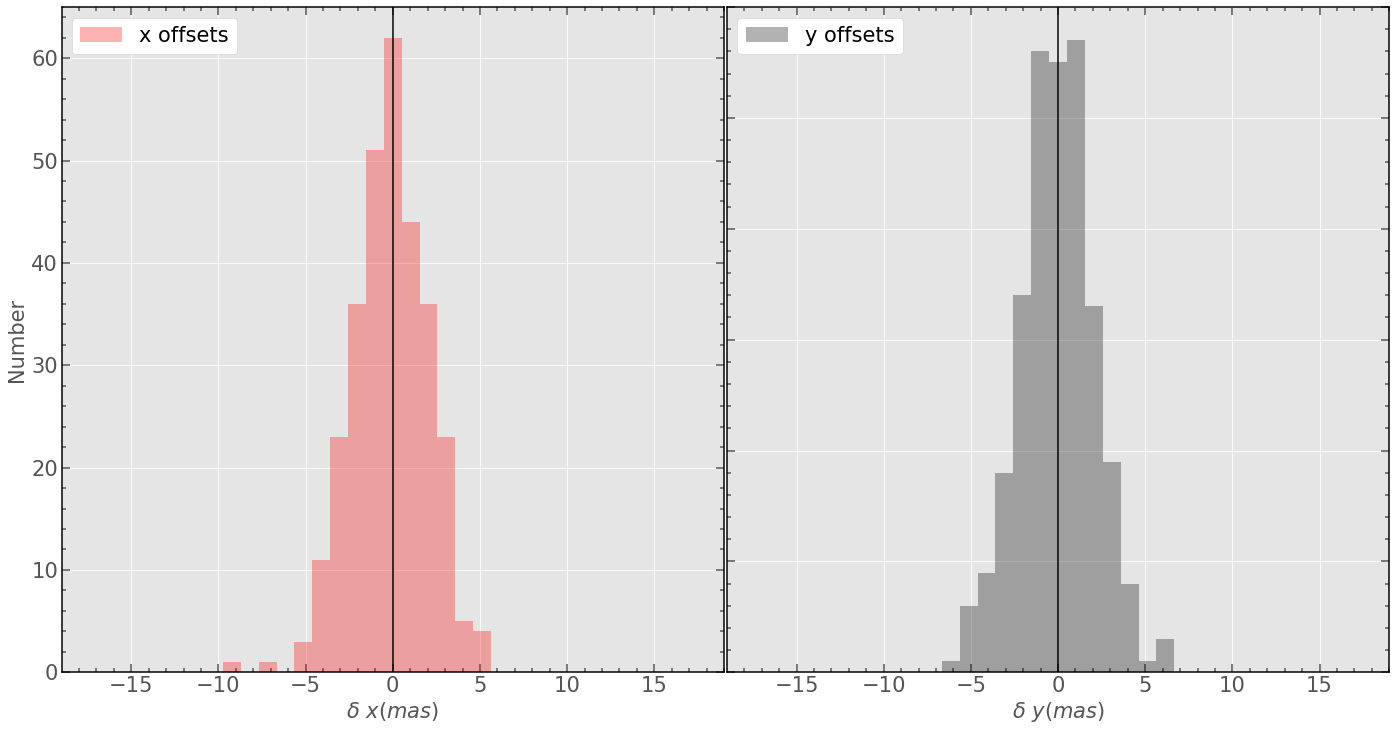

In [14]:
z = {"HE0040-1105":0.041692}


objs = z.keys()

for obj in objs:
    algorithm_script(obj,z[obj])

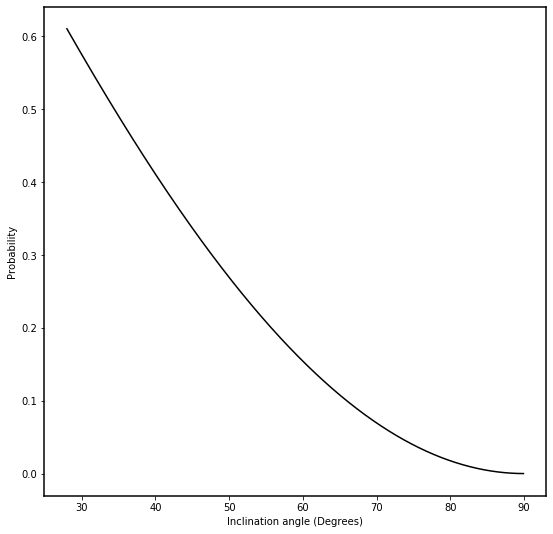

In [4]:
fig = plt.figure(figsize=(9,9))
i = np.arange(28.0, 90.0, 0.1)
i
P = np.ones(len(i)) 
q = np.sin(i*(np.pi/180))
plt.xlabel('Inclination angle (Degrees)')
plt.ylabel('Probability')
plt.plot(i,1.15*(P - q),'k')

In [2]:
import numpy as np

i1 = np.arange(0.0, 55.0, 5.0)
i2 = np.arange(5.0,60.0,5.0)
A = np.cos(0.0*(np.pi/180)) - np.cos(60.0*(np.pi/180))

p = (np.cos(i1*(np.pi/180)) - np.cos(i2*(np.pi/180)))/A

In [3]:
B = np.cos(0.0*(np.pi/180)) - np.cos(2.0*(np.pi/180))
B/A

0.001218345961808476

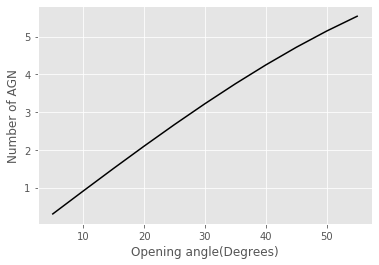

In [4]:
import matplotlib.pyplot as plt
plt.plot(i2,40*p,'k')
plt.xlabel('Opening angle(Degrees)')
plt.ylabel('Number of AGN')
plt.show()

In [6]:
P = (np.cos(i1*(np.pi/180)) - np.cos((i1+5)*(np.pi/180)))/A
1/A

2.0000000000000004

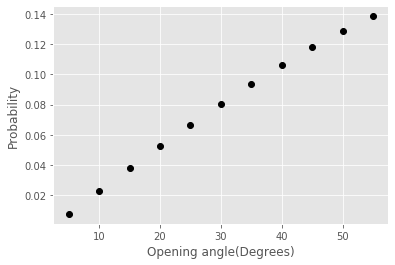

In [7]:
plt.plot(i2,P,'ko')
plt.xlabel('Opening angle(Degrees)')
plt.ylabel('Probability')
plt.show()

In [8]:
import numpy as np

i1_2 = np.arange(50, 94, 4)
A_2 = np.cos(50*(np.pi/180)) - np.cos(94*(np.pi/180))

i_bins2 = np.arange(11, 22,1)
p_bins2 = (np.cos(i1_2*(np.pi/180)) - np.cos((i1_2+4)*(np.pi/180)))/A_2
print(i1_2)
print(p_bins2)
s = 100000
sample2 = np.random.choice(i1_2,size=s,p=p_bins2)


[50 54 58 62 66 70 74 78 82 86 90]
[0.07719152 0.0812104  0.08483363 0.08804356 0.09082456 0.09316306
 0.09504768 0.09646925 0.09742082 0.09789777 0.09789777]


In [13]:
i1_1 = np.arange(0, 55, 5)
A_1 = np.cos(0.0*(np.pi/180)) - np.cos(55.0*(np.pi/180))

i_bins1 = np.arange(1, 12, 1)
p_bins1 = (np.cos(i1_1*(np.pi/180)) - np.cos((i1_1+5)*(np.pi/180)))/A_1

print(A_2)
print(i_bins1)
s = 1000000
sample1 = np.random.choice(i1_1,size=s,p=p_bins1)

0.7125440834306647
[ 1  2  3  4  5  6  7  8  9 10 11]


In [10]:

loops = 200
par_iter = np.zeros((1,loops))
print (np.mean(sample2))
for l in range(loops):
    mean_angle_iter = np.mean(np.random.choice(i1_2,size=100000,p=p_bins2))
    par_iter[:,l] = mean_angle_iter
angle_err2 = np.std(par_iter,1)
print (angle_err2)

loops = 200
par_iter = np.zeros((1,loops))
print (np.mean(sample1))
for l in range(loops):
    mean_angle_iter = np.mean(np.random.choice(i1_1,size=100000,p=p_bins1))
    par_iter[:,l] = mean_angle_iter
angle_err1 = np.std(par_iter,1)
print (angle_err1)

70.93204
[0.04137895]
33.51498
[0.04284243]


Text(0, 0.5, 'Number')

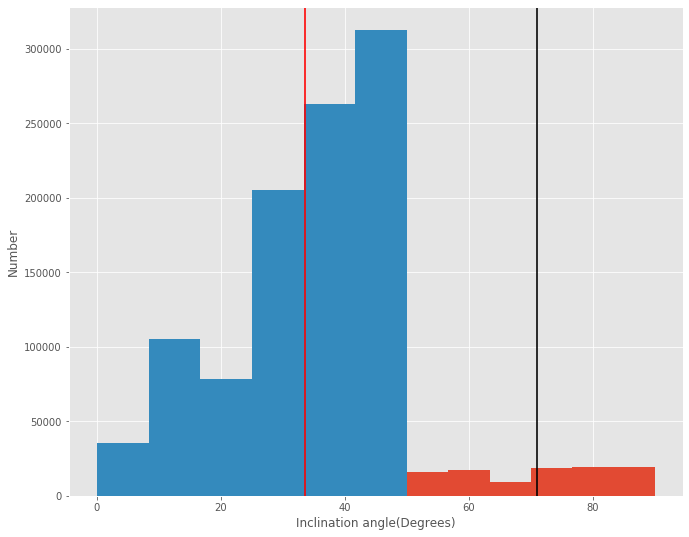

In [11]:
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(11,9))

plt.hist(sample2,bins=6)
plt.hist(sample1,bins=6)
plt.axvline(x=np.mean(sample1),color='r')
plt.axvspan(np.mean(sample1) - angle_err1, np.mean(sample1) + angle_err1, alpha=0.2, color='red')
plt.axvline(x=np.mean(sample2),color='k')
plt.axvspan(np.mean(sample2) - angle_err2, np.mean(sample2) + angle_err2, alpha=0.2, color='k')
plt.xlabel('Inclination angle(Degrees)')
plt.ylabel('Number')


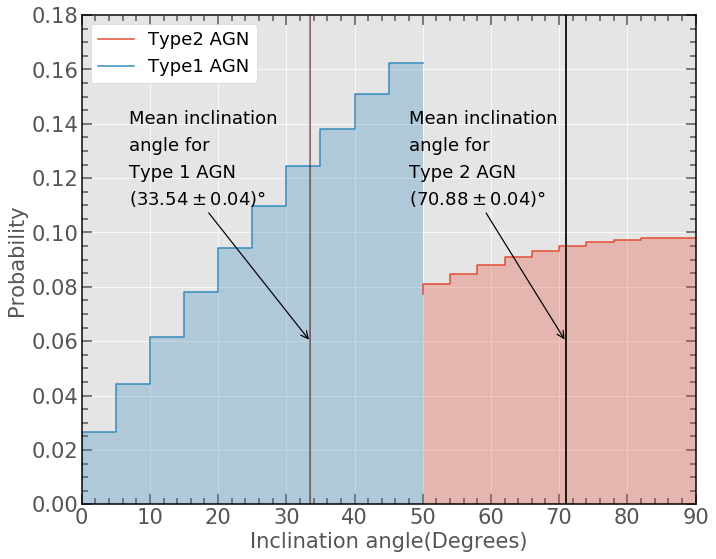

In [14]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'
fig = plt.figure(figsize=(11,9))

plt.fill_between(i1_2,p_bins2,step='pre',alpha=0.3)
plt.fill_between(i1_1,p_bins1,step='pre',alpha=0.3)
plt.plot(i1_2,p_bins2,drawstyle="steps",label='Type2 AGN')
plt.plot(i1_1,p_bins1,drawstyle="steps",label='Type1 AGN')

plt.axvline(x=np.mean(sample1),color='k',alpha=0.5)
plt.axvspan(np.mean(sample1) - angle_err1, np.mean(sample1) + angle_err1, alpha=0.5, color='red')
plt.axvline(x=np.mean(sample2),color='k')
plt.axvspan(np.mean(sample2) - angle_err2, np.mean(sample2) + angle_err2, alpha=0.5, color='k')
plt.xlabel('Inclination angle(Degrees)',fontsize=21)
plt.ylabel('Probability',fontsize=21)
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=21)
plt.tick_params(axis='both',which='major',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=10)
plt.tick_params(axis='both',which='minor',direction='in',width=1.5,bottom=True,left=True,right=True,top=True,length=6)
plt.annotate(r'Mean inclination',xy=(np.mean(sample1),0.06),xytext=(7,0.14),fontsize=18)
plt.annotate(r'angle for ',xy=(np.mean(sample1),0.06),xytext=(7,0.13),fontsize=18)
plt.annotate(r'Type 1 AGN',xy=(np.mean(sample1),0.06),xytext=(7,0.12),fontsize=18)
plt.annotate(r'$(33.54 \pm 0.04)\degree$',xy=(np.mean(sample1),0.06),xytext=(7,0.11),arrowprops=dict(arrowstyle= '->',color='black',lw=1.2,connectionstyle='arc'),fontsize=18)

plt.annotate(r'Mean inclination',xy=(np.mean(sample2),0.06),xytext=(48,0.14),fontsize=18)
plt.annotate(r'angle for ',xy=(np.mean(sample2),0.06),xytext=(48,0.13),fontsize=18)
plt.annotate(r'Type 2 AGN',xy=(np.mean(sample2),0.06),xytext=(48,0.12),fontsize=18)
plt.annotate(r'$(70.88 \pm 0.04)\degree$',xy=(np.mean(sample2),0.06),xytext=(48,0.11),arrowprops=dict(arrowstyle= '->',color='black',lw=1.2,connectionstyle='arc'),fontsize=18)


plt.minorticks_on()
plt.legend(facecolor='white', framealpha=1, fontsize=18, loc='upper left')
plt.ylim(0,0.18)
plt.xlim(0,90)
fig.savefig('/home/mainak/Downloads/Outflow_paper2/AGN_inclination.png',overwrite=True)


In [19]:
2.7/(169.9*4.848)

0.0032779911304844436